## WB1 - Exploring Data

The audio processing will be handled by the [librosa](https://librosa.github.io/librosa/index.html) library.

The following folder structure has to be followed to have the same results.

data/

    physionet/
        training-a
        training-b
        ...
        training-f
        
    kaggle/
        set_a.csv
        set_a/

In [29]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from librosa import display

First lets define some functions that will be of help to load the files and vizualize the waves.

In [2]:
def load_files(file_paths, sr):
    waves = []
    for path in file_paths:
        X,sr = librosa.load(path, sr=sr)
        waves.append(X)
    return waves

def plot_waves(waves, labels):
    subplot_cols = len(waves)
    fig = plt.figure(figsize=(25,10))
    for i, label, wave in zip(range(subplot_cols), labels, waves):
        plt.subplot(1,3,i+1)
        librosa.display.waveplot(wave)
        plt.title(label)
    plt.show()
    
def plot_specgram(waves, labels):
    subplot_cols = len(waves)
    fig = plt.figure(figsize=(25,10))
    for i, label, wave in zip(range(subplot_cols), labels, waves):
        plt.subplot(1,3,i+1)
        specgram(np.array(wave), Fs=2000)
        plt.title(label)
    plt.show()
    
def plot_log_power_specgram(waves, labels):
    subplot_cols = len(waves)
    fig = plt.figure(figsize=(25,10))
    for i, label, wave in zip(range(subplot_cols), labels, waves):
        plt.subplot(1,3,i+1)
        D = librosa.logamplitude(np.abs(librosa.stft(wave))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(label)
    plt.show()

Now that we have some helper functions lets use them on the Physionet Cardiology Challenge 2016 dataset. The dataset contains normal and abnormal heartbeats. Each recording has a sampling rate of 2000. I will vizualize both to see if at first sight its possible to distinguish between the two.

The classic view to visualize sound is through a waveform, which basically shows the amplitude of sound over an interval of time. This is what is shown in the first row of graphs.

Matplotlib provides another type of visualiztion called a spectrogram. Which is a visual representation of the spectrum of frequencies of sound as they vary with time. This is shown in the row of graphs.

Finally the log power spectrogram is shown in the last row. 

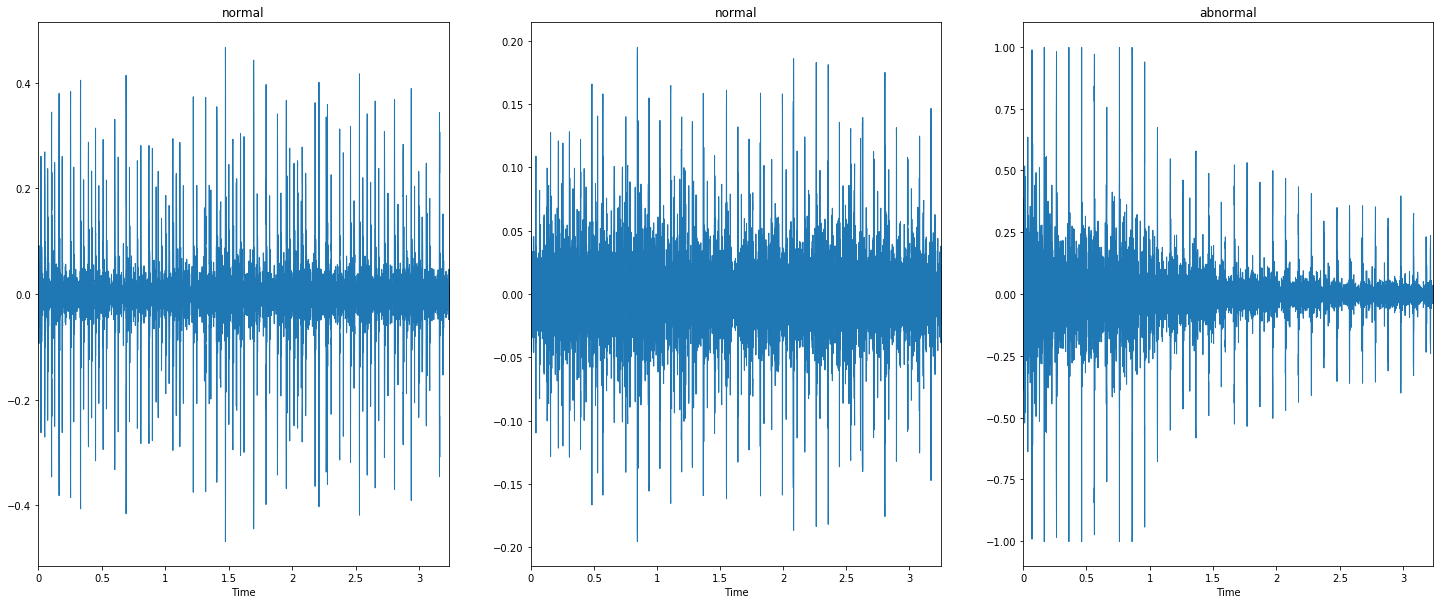

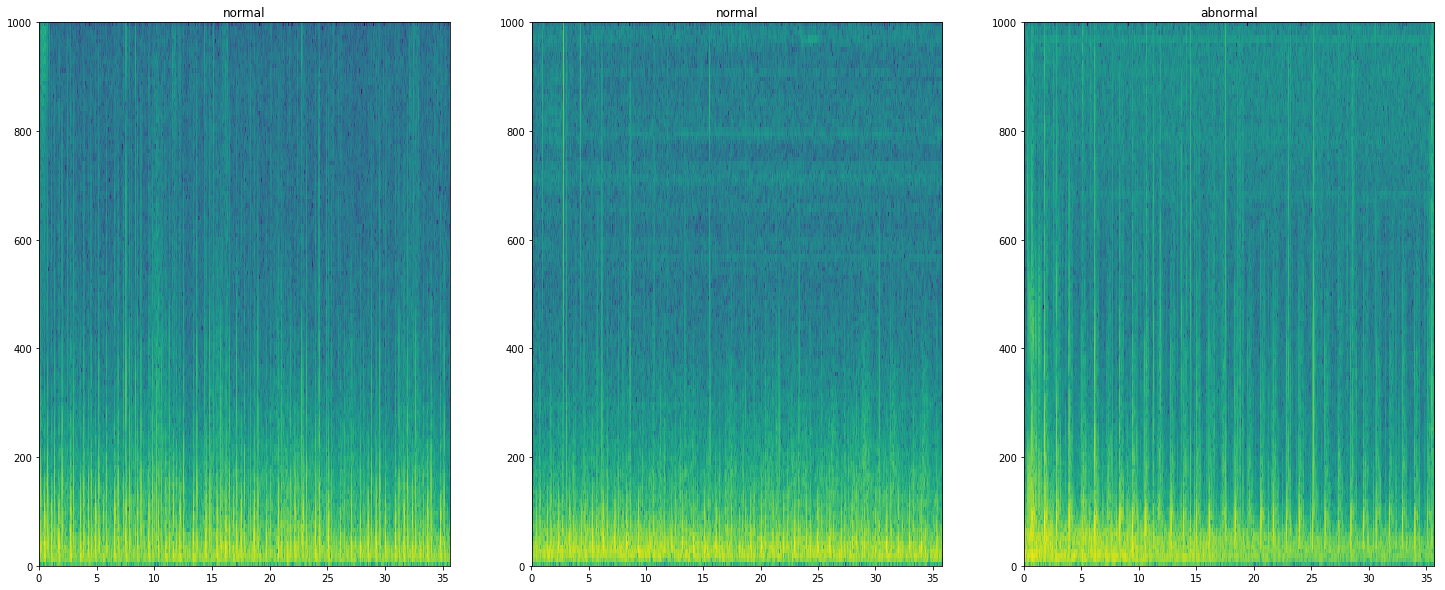

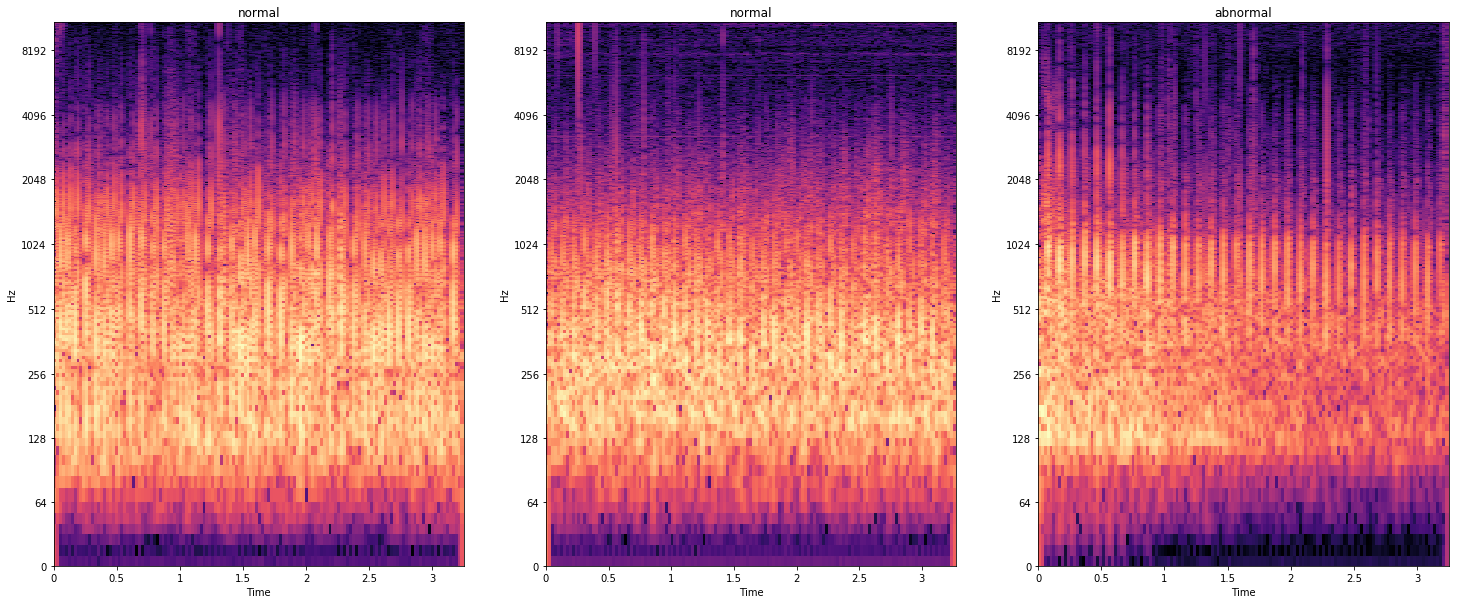

In [5]:
files = ['data/physionet/training-a/a0007.wav', 'data/physionet/training-a/a0053.wav', 'data/physionet/training-a/a0014.wav']
labels = ['normal', 'normal', 'abnormal']

waves = load_files(files, 2000)
plot_waves(waves, labels)
plot_specgram(waves, labels)
plot_log_power_specgram(waves, labels)

The training data coming from the PhysioNet 2016 Cardiology Challenge consists of five databases (A through E) containing a total of 3,126 heart sound recordings. Each database is represented as a folder containing all the audio belonging to that database and also there is a CSV file that indicates which of those audios are normal or abnormal. The following cells will create a dataframe for each CSV present in the five databases and then concatenate them to a sigle dataframe. The CSV files do not come with a header so one will be placed. It is also important to mention that the target variable has a value of `-1` for normal heartbeats and a value of `1` for abnormal heartbeats.

In [6]:
df_a = pd.read_csv('data/physionet/training-a/REFERENCE.csv', names = ['file', 'target'])
df_b = pd.read_csv('data/physionet/training-b/REFERENCE.csv', names = ['file', 'target'])
df_c = pd.read_csv('data/physionet/training-c/REFERENCE.csv', names = ['file', 'target'])
df_d = pd.read_csv('data/physionet/training-d/REFERENCE.csv', names = ['file', 'target'])
df_e = pd.read_csv('data/physionet/training-e/REFERENCE.csv', names = ['file', 'target'])

In [7]:
df_a['target'].value_counts()

 1    292
-1    117
Name: target, dtype: int64

In [8]:
df_b['target'].value_counts()

-1    386
 1    104
Name: target, dtype: int64

In [9]:
df_c['target'].value_counts()

 1    24
-1     7
Name: target, dtype: int64

In [10]:
df_d['target'].value_counts()

 1    28
-1    27
Name: target, dtype: int64

In [11]:
df_e['target'].value_counts()

-1    1958
 1     183
Name: target, dtype: int64

In [12]:
df_physionet = pd.concat([df_a, df_b, df_c, df_d, df_e], ignore_index=True)

In [13]:
df_physionet['target'] = df_physionet['target'].apply(lambda x: 'normal' if x == -1 else 'abnormal')

In [16]:
df_physionet_label_counts = df_physionet['target'].value_counts()

In [17]:
df_physionet_label_counts

normal      2495
abnormal     631
Name: target, dtype: int64

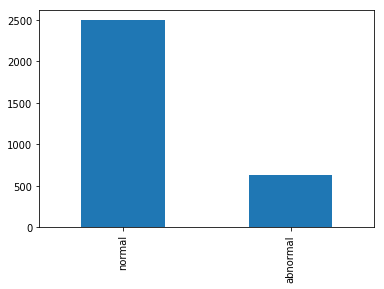

In [18]:
df_physionet_label_counts.plot.bar()
plt.show()

A similar approach will be taken to explore the Kaggle dataset. This dataset contains recordings from healthy subjects and patients with different kinds of heart conditions: normal, artifact, murmur and extra heartbeat. There is a total of 176 audio files out of which only 124 files are labeled so we will remove the ones that do not have a label. Also the column with the name 'sublabel' is empty so it will be also dropped from the dataset.

In [21]:
df_kaggle = pd.read_csv('data/kaggle/set_a.csv')

In [22]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [23]:
df_kaggle.drop(['sublabel'], axis=1, inplace=True)

In [24]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
dataset    176 non-null object
fname      176 non-null object
label      124 non-null object
dtypes: object(3)
memory usage: 4.2+ KB


In [25]:
df_kaggle.dropna(inplace=True)

In [26]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 3 columns):
dataset    124 non-null object
fname      124 non-null object
label      124 non-null object
dtypes: object(3)
memory usage: 3.9+ KB


In [27]:
df_kaggle_label_counts = df_kaggle['label'].value_counts()

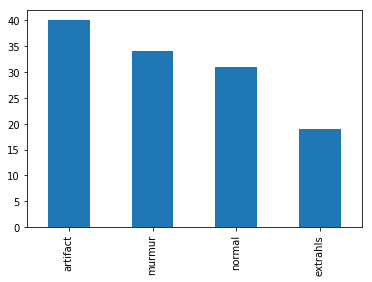

In [28]:
df_kaggle_label_counts.plot.bar()
plt.show()